In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# загрузка

In [5]:
df_test = pd.read_csv('test.csv', index_col = ['Id'])
df_train = pd.read_csv('train.csv', index_col = ['Id'])
df_sample = pd.read_csv('sample_submission.csv')

In [6]:
df_test['train_test'] = 'test'
df_train['train_test'] = 'train'

In [7]:
df = pd.concat([df_train, df_test], axis = 0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


# predprocessing

In [8]:
corr_matrix = df.corr()
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420
BsmtFinSF2,-0.072530,0.047431,0.084059,-0.042771,0.041501,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,...,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,0.008883,-0.011378


<AxesSubplot:xlabel='LotArea', ylabel='Count'>

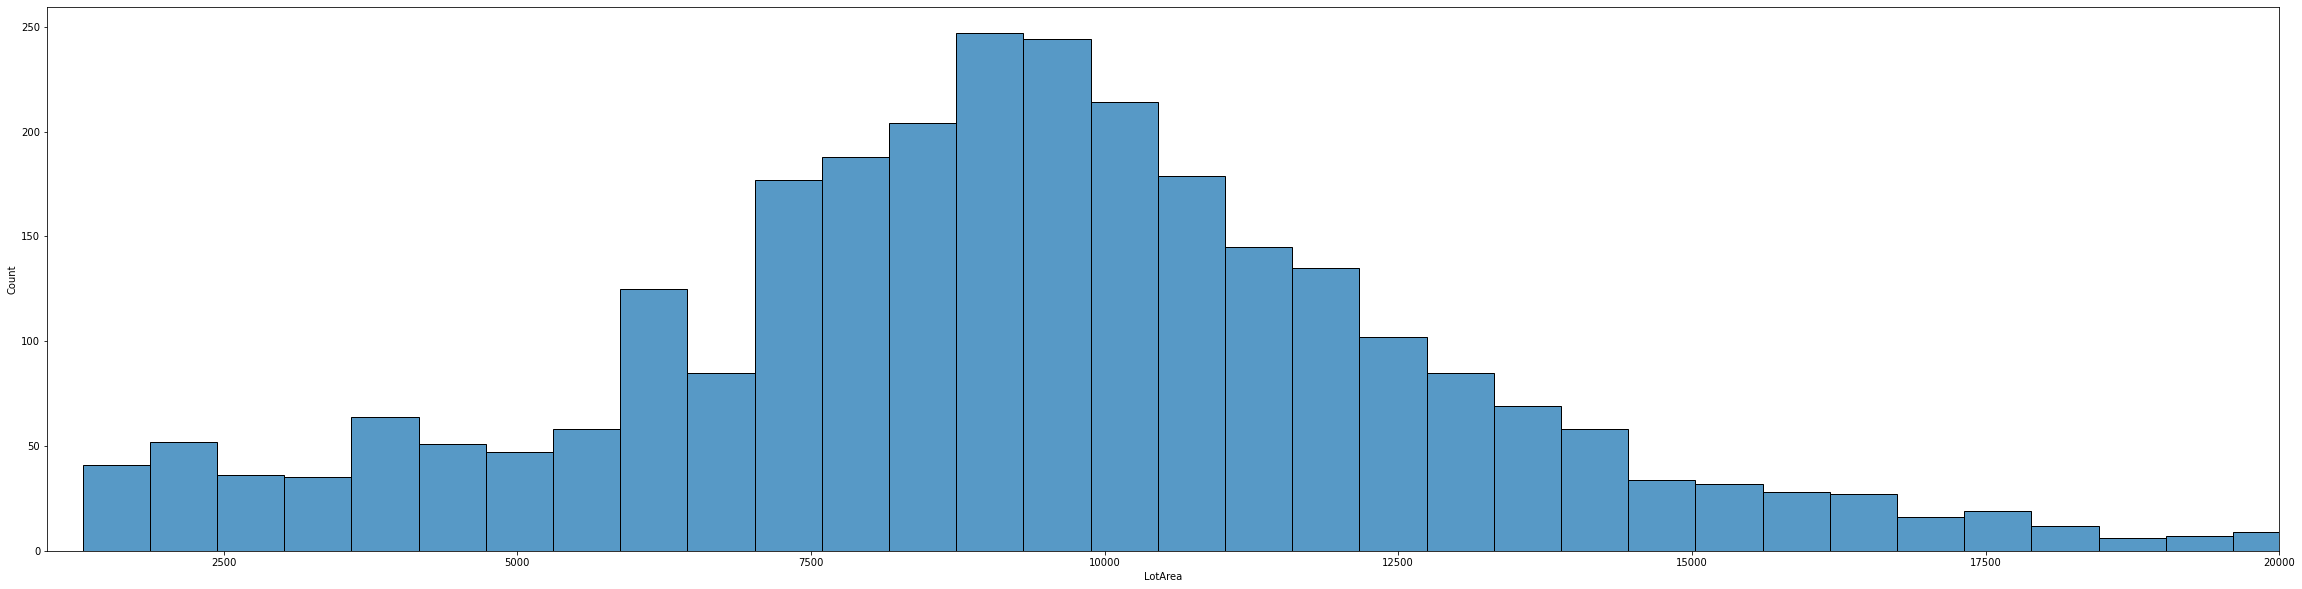

In [9]:
plt.figure(figsize = (40,10))
plt.xlim(1000,20000)
sns.histplot(data = df, x = 'LotArea' )

In [10]:
round(df[df['GarageType']=='Detchd'][['GarageCars']].mean())

GarageCars    2.0
dtype: float64

In [11]:
df['GarageCars'] = df['GarageCars'].fillna(round(df[df['GarageType']=='Detchd']['GarageCars'].mean()))

In [12]:
df['GarageArea'] = df['GarageArea'].fillna(round(df[df['GarageType']=='Detchd']['GarageArea'].mean()))

In [13]:
#df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(round(df['BsmtFinSF2'].mean()))
#df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(round(df['TotalBsmtSF'].mean()))
#df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
#df['GarageYrBlt'] = df['GarageYrBlt'].fillna(lambda row: mean_GarageYrBlt.loc[row['GarageType']])

df['Alley'].fillna('no_alley', inplace=True)
df['MSZoning'] = df['MSZoning'].fillna('RL')
df['Utilities'] = df['Utilities'].fillna('AllPub')
df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')
df['Exterior2nd'] = df['Exterior2nd'].fillna('VinylSd')
df['MasVnrType'].fillna('no_inform', inplace=True)
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['KitchenQual'] = df['KitchenQual'].fillna('no_inform')
df['Functional'] = df['Functional'].fillna('Typ')
df['SaleType'] = df['SaleType'].fillna('WD')
df['BsmtQual'] = df['BsmtQual'].fillna('no_basement')
df['BsmtCond'] = df['BsmtCond'].fillna('no_basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('no_basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('no_basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('no_basement')
df['FireplaceQu'] = df['FireplaceQu'].fillna('no_fireplace')
df['GarageType'] = df['GarageType'].fillna('no_garage')
df['GarageFinish'] = df['GarageFinish'].fillna('no_garage')
df['GarageQual'] = df['GarageQual'].fillna('no_garage')
df['GarageCond'] = df['GarageCond'].fillna('no_garage')
df['GarageCond'] = df['GarageCond'].fillna('no_garage')
df['PoolQC'] = df['PoolQC'].fillna('no_pool')
df['Fence'] = df['Fence'].fillna('no_fence')
df['MiscFeature'] = df['MiscFeature'].fillna('no_feature')

In [14]:
df.select_dtypes(include=['object']).isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
train_test       0
dtype: int64

In [15]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(round(df['BsmtFinSF1'].mean()))
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(round(df['BsmtFinSF2'].mean()))
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(round(df['BsmtUnfSF'].mean()))
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(round(df['TotalBsmtSF'].mean()))
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df.groupby('GarageType')['GarageYrBlt'].transform('mean'))
df['MasVnrArea'] = df['MasVnrArea'].fillna(round(df['MasVnrArea'].mean()))
df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('Alley')['LotFrontage'].transform('mean'))

In [16]:
df[df['LotFrontage'].isnull()][['LotFrontage']]
df['GarageYrBlt'].iloc[7:13]
#df['GarageType'].isnull().sum()
df['GarageYrBlt'].isnull().sum()

157

In [17]:
df.select_dtypes(include=['int64', 'float64']).isnull().sum()

MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       157
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [18]:
#Для тестирования

df[df['MasVnrArea'].isnull()]['MasVnrType'].value_counts()
#df['BsmtFullBath'].value_counts()
#df['Age_fill'] = df.apply(lambda row: mean_age.loc[(row['Sex'], row['Pclass'])], axis=1)
df[df['MasVnrArea'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
Id,,,,,,,,,,,,,,,,,,,,,


<AxesSubplot:>

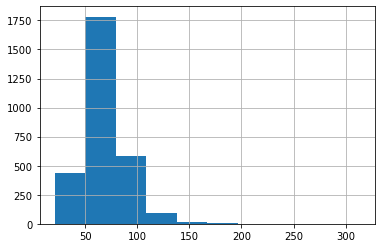

In [19]:
df['LotFrontage'].hist()

<AxesSubplot:>

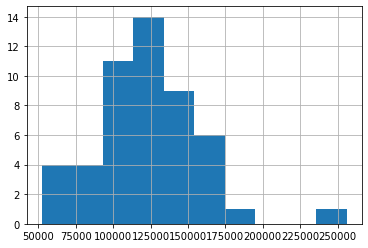

In [20]:
df[df['Alley']=='Grvl']['SalePrice'].hist()

# One-hot-encoding

In [21]:
cat_features = ['MSZoning',
            'Street',
            'Alley', 
            'LotShape', 
            'LandContour', 
            'Utilities', 
            'LotConfig',
            'LandSlope', 
            'Neighborhood', 
            'Condition1', 
            'Condition2',
            'GarageQual',
            'BldgType',
            'HouseStyle', 
            'RoofStyle', 
            'RoofMatl', 
            'Exterior1st', 
            'Exterior2nd', 
            'MasVnrType',
            'ExterQual', 
            'ExterCond', 
            'Foundation', 
            'BsmtQual',
            'BsmtCond', 
            'BsmtExposure', 
            'BsmtFinType1',
            'BsmtFinType2',
            'Heating',
            'HeatingQC', 
            'CentralAir', 
            'Electrical', 
            'KitchenQual',
            'Functional',
            'FireplaceQu', 
            'GarageType',
            'GarageFinish', 
            'GarageCond', 
            'PavedDrive', 
            'PoolQC',
            'Fence', 
            'MiscFeature', 
            'SaleType',
            'SaleCondition',
            'OverallQual', 
            #'OverallCond',
            #'MSSubClass'
               ]

In [22]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoder.fit(df[cat_features])
cat_enc_cols = [f'{c}_{el}' for arr, c in zip(onehot_encoder.categories_, cat_features) for el in arr]

one_frame =  pd.DataFrame(onehot_encoder.transform(df[cat_features]),
                          columns=cat_enc_cols, index = df.index)
one_frame.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_no_alley,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
features = [#'Id',  
            'LotFrontage', 
            #'LotArea',  
            'YearBuilt', 
            'YearRemodAdd',
            'MasVnrArea', #Masonry veneer area in square feet 
            'BsmtFinSF1', 
            #'BsmtFinSF2', 
            'BsmtUnfSF', 
            'TotalBsmtSF', 
            '1stFlrSF', 
            '2ndFlrSF',
            'LowQualFinSF', 
            'GrLivArea', 
            'BsmtFullBath', 
            'BsmtHalfBath', 
            'FullBath',
            'HalfBath', 
            'BedroomAbvGr', 
            'KitchenAbvGr',
            'TotRmsAbvGrd', 
            'Fireplaces',
            #'GarageYrBlt',
            'GarageCars', 
            'GarageArea',
            'WoodDeckSF', 
            'OpenPorchSF',
            #'EnclosedPorch', 
            #'3SsnPorch', 
            #'ScreenPorch', 
            #'PoolArea', 
            #'MiscVal', 
            #'MoSold', 
            #'YrSold', 
            *cat_enc_cols
]    
            
tr_te = 'train_test'          
target = 'SalePrice'

In [24]:
df_all = pd.merge(df, one_frame, on = 'Id')

In [25]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# train_test_split, normalization

In [26]:
df_train = df_all[df_all['train_test']=='train']
df_test = df_all[df_all['train_test']=='test']

In [27]:
target = df_train['SalePrice']
x, y = df_train[features].to_numpy(), target.to_numpy()
target

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1)
x_train.shape,  x_test.shape, y_train.shape, y_test.shape

((1022, 301), (438, 301), (1022,), (438,))

In [29]:
#Normalizaton
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

# GBR

In [31]:
# Grid search + cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer, mean_squared_log_error

# создаем объект, не задавая параметры. Можно задать параметры, которые не будет изменяться при GS
GBR = GradientBoostingRegressor()

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {
    'loss': ['ls', 'lad','huber'],
    'learning_rate': [0.2, 0.3, 0.5],
    'n_estimators': [8, 10,12,20],
    'max_depth': [6, 8,10],
    'max_leaf_nodes': [35,40,45, None],
    'max_features':['log2', 'sqrt']
}


# создаем объект
cv = GridSearchCV(
    estimator=GBR,
    param_grid=param_grid,
    scoring = make_scorer(lambda t,p: mean_squared_log_error(t,p)**.5, greater_is_better=False), # метрика, которую будем *максимизировать*
    return_train_score= True,
    #refit= make_scorer(lambda t,p: mean_squared_log_error(t,p)**.5, greater_is_better=False),
    cv=5, # количество фолдов
    verbose=4, # сколько печатать сообщений
    n_jobs=-1, # насколько параллелельно считаем
)

In [223]:
cv.fit(x_train_norm, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.5],
                         'loss': ['ls', 'lad', 'huber'],
                         'max_depth': [6, 8, 10],
                         'max_features': ['log2', 'sqrt'],
                         'max_leaf_nodes': [35, 40, 45, None],
                         'n_estimators': [8, 10, 12, 20]},
             return_train_score=True,
             scoring=make_scorer(<lambda>, greater_is_better=False), verbose=4)

In [224]:
cv.best_params_, cv.best_score_

({'learning_rate': 0.2,
  'loss': 'huber',
  'max_depth': 8,
  'max_features': 'sqrt',
  'max_leaf_nodes': 35,
  'n_estimators': 20},
 -0.1483538905913711)

In [225]:
cv.best_estimator_, cv.best_estimator_.predict

(GradientBoostingRegressor(learning_rate=0.2, loss='huber', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=35,
                           n_estimators=20),
 <bound method GradientBoostingRegressor.predict of GradientBoostingRegressor(learning_rate=0.2, loss='huber', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=35,
                           n_estimators=20)>)

In [230]:
cv.best_estimator_.fit(x_train_norm,y_train)

GradientBoostingRegressor(learning_rate=0.2, loss='huber', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=35,
                          n_estimators=20)

In [231]:
print(f'''
    Score:
    train {mean_squared_log_error(y_train, cv.best_estimator_.predict(x_train))**.5 :.2f}
    test {mean_squared_log_error(y_test, cv.best_estimator_.predict(x_test))**.5 :.2f}  
''')



    Score:
    train 0.58
    test 0.62  



# KNN

In [58]:
# Grid search + cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
# создаем объект, не задавая параметры. Можно задать параметры, которые не будет изменяться при GS
KNR = KNeighborsRegressor( )

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {
    'n_neighbors': [3,5,7,11],
    'p': [1,2,3],
    'weights': ['uniform', 'distance'],
    'leaf_size':[9, 10, 12] 
}

# создаем объект
cv_knn = GridSearchCV(
    estimator = KNR, 
    param_grid = param_grid,
    scoring = make_scorer(lambda t,p: mean_squared_log_error(t,p)**.5, greater_is_better=False), # метрика, которую будем *максимизировать*
    return_train_score= True,
    cv=5, #кол-во фолдов
    verbose = 4,
    n_jobs = -1 # насколько параллелельно считаем,
    #refit=True
    )

In [59]:
cv_knn.fit(x_train_norm, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [9, 10, 12], 'n_neighbors': [3, 5, 7, 11],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             return_train_score=True,
             scoring=make_scorer(<lambda>, greater_is_better=False), verbose=4)

In [60]:
cv_knn.best_params_, cv_knn.best_score_

({'leaf_size': 9, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'},
 -0.17889836037273693)

In [61]:
cv_knn.best_estimator_, cv_knn.best_estimator_.predict

(KNeighborsRegressor(leaf_size=9, p=1, weights='distance'),
 <bound method KNeighborsRegressor.predict of KNeighborsRegressor(leaf_size=9, p=1, weights='distance')>)

In [62]:
cv_knn.best_estimator_.fit(x_train_norm,y_train)

KNeighborsRegressor(leaf_size=9, p=1, weights='distance')

In [63]:
print(f'''
    Score:
    train {mean_squared_log_error(y_train, cv_knn.best_estimator_.predict(x_train))**.5 :.2f}
    test {mean_squared_log_error(y_test, cv_knn.best_estimator_.predict(x_test))**.5 :.2f}  
''')


    Score:
    train 0.40
    test 0.45  



# ElasticNet

In [40]:
from sklearn.linear_model import ElasticNet

EN = ElasticNet()

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {
    'alpha': [0.5,0.7,1,2,3,4],
    'l1_ratio': [0.05,0.7,0.8,1,5,6,7,8]
}

# создаем объект
cv_EN = GridSearchCV(
    estimator = EN, 
    param_grid = param_grid,
    scoring = make_scorer(lambda t,p: mean_squared_log_error(t,p)**.5, greater_is_better=False), # метрика, которую будем *максимизировать*
    return_train_score= True,
    cv=3, #кол-во фолдов
    verbose = 4,
    n_jobs = -1 # насколько параллелельно считаем,
    #refit=True
    )


In [41]:
y_train_en = np.log(y_train)
y_test_en = np.log(y_test)

In [42]:
cv_EN.fit(x_train_norm, y_train_en)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.01310681 -0.02931201 -0.02931201 -0.02931201         nan         nan
         nan         nan -0.01420458 -0.02931201 -0.02931201 -0.02931201
         nan         nan         nan         nan -0.01580511 -0.02931201
 -0.02931201 -0.02931201         nan         nan         nan         nan
 -0.02049089 -0.02931201 -0.02931201 -0.02931201         nan         nan
         nan         nan -0.02450659 -0.02931201 -0.02931201 -0.02931201
         nan         nan         nan         nan -0.0275149  -0.02931201
 -0.02931201 -0.02931201         nan         nan         nan         nan]
  category=UserWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the train scores are non-finite: [-0.01173111 -0.02930796 -0.02930796 -0.02930796         nan         nan
         nan         nan -0.0133

GridSearchCV(cv=3, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.5, 0.7, 1, 2, 3, 4],
                         'l1_ratio': [0.05, 0.7, 0.8, 1, 5, 6, 7, 8]},
             return_train_score=True,
             scoring=make_scorer(<lambda>, greater_is_better=False), verbose=4)

In [43]:
cv_EN.best_params_, cv_EN.best_score_

({'alpha': 0.5, 'l1_ratio': 0.05}, -0.013106810724799037)

In [44]:
cv_EN.best_estimator_, cv_EN.best_estimator_.predict

(ElasticNet(alpha=0.5, l1_ratio=0.05),
 <bound method LinearModel.predict of ElasticNet(alpha=0.5, l1_ratio=0.05)>)

In [45]:
cv_EN.best_estimator_.fit(x_train_norm,y_train_en)

ElasticNet(alpha=0.5, l1_ratio=0.05)

In [46]:
print(f'''
    Score:
    train {mean_squared_log_error(y_train_en, cv_EN.best_estimator_.predict(x_train))**.5 :.2f}
    test {mean_squared_log_error(y_test_en, cv_EN.best_estimator_.predict(x_test))**.5 :.2f} 
    
    r2_score_train {r2_score(y_train_en, cv_EN.best_estimator_.predict(x_train))}
    r2_score_test {r2_score(y_test_en, cv_EN.best_estimator_.predict(x_test))}
''')


    Score:
    train 2.89
    test 2.89 
    
    r2_score_train -359570.89567572693
    r2_score_test -273477.9033175673



In [48]:
np.e**cv_EN.best_estimator_.predict(x_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in power
  """Entry point for launching an IPython kernel.


array([2.30157886e+107, 3.58707882e+119, 6.10864808e+088, ...,
       6.05686985e+085, 9.51845159e+076, 2.27038047e+089])

In [ ]:
#submission = pd.DataFrame({"Id":test_id,"SalePrice":np.e**elastic_net.predict(test)})

In [49]:
x_test_kag = df_test[features].to_numpy()
x_test_test_norm = scaler.transform(x_test_kag)

In [54]:
#x_test_kag = df_test[features].to_numpy()
#x_test_test_norm = scaler.transform(x_test_kag)

cv_EN.best_estimator_.predict(x_test_test_norm)
df_sample['SalePrice'] = np.e**cv_EN.best_estimator_.predict(x_test_test_norm)

df_sample.to_csv('house_prices_kag_EN.csv',columns = ['Id','SalePrice'],index=False)